In [ ]:
!pip install  fuzzywuzzy

In [ ]:
!pip install  plotly_express

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd


import seaborn as sns
import plotly_express as px
import matplotlib.pyplot as plt

import chardet
import fuzzywuzzy
from scipy import stats
# !pip install missingno
import missingno as mno
from fuzzywuzzy import process
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

import xgboost as xg
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

import warnings
np.random.seed(0)
warnings.filterwarnings('ignore')

In [ ]:
train  = pd.read_csv("/content/drive/MyDrive/salesprediction/Train.csv")
test = pd.read_csv("/content/drive/MyDrive/salesprediction/Test.csv")

In [ ]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
train.shape

(8523, 12)

In [ ]:
test.shape

(5681, 11)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [ ]:
train.isnull().sum().sort_values()

,0
Item_Identifier,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Location_Type,0
Outlet_Type,0
Item_Outlet_Sales,0


In [ ]:
test.isnull().sum().sort_values()

,0
Item_Identifier,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Location_Type,0
Outlet_Type,0
Item_Weight,976


In [ ]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


<Axes: xlabel='Item_Outlet_Sales', ylabel='Density'>

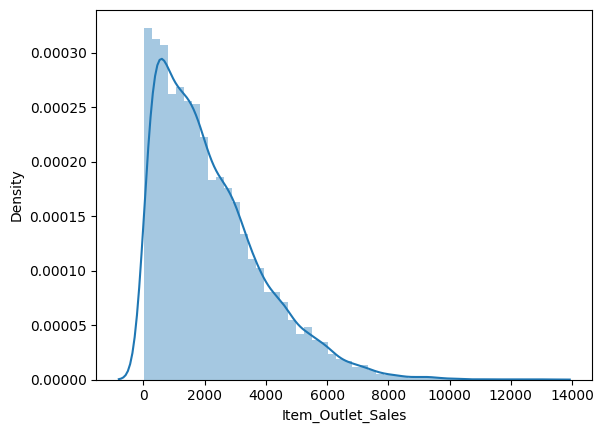

In [ ]:
sns.distplot(train['Item_Outlet_Sales'])

In [ ]:
print("Skewness ", train['Item_Outlet_Sales'].skew())
print("Kurtosis ", train['Item_Outlet_Sales'].kurt())

Skewness  1.1775306028542796
Kurtosis  1.6158766814287264


In [ ]:
sale_MRP = pd.concat([train['Item_Outlet_Sales'],train['Item_MRP']],axis=1)
px.scatter(sale_MRP,x='Item_MRP',y='Item_Outlet_Sales')


<Axes: xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

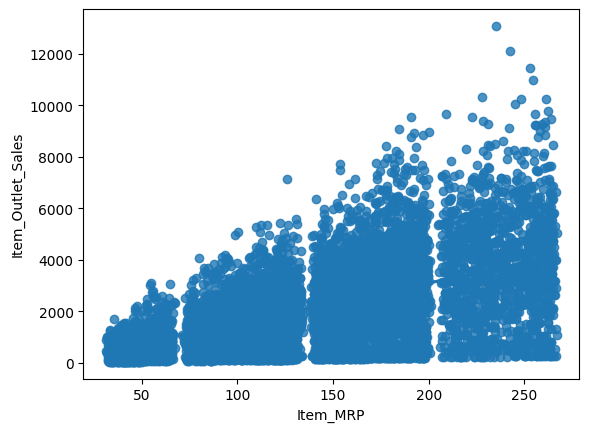

In [ ]:
sns.regplot(x='Item_MRP',y='Item_Outlet_Sales',data=sale_MRP)

In [ ]:
sale_weight = pd.concat([train['Item_Outlet_Sales'],train['Item_Weight']],axis=1)
px.scatter(sale_weight,x='Item_Weight',y='Item_Outlet_Sales')

In [ ]:
sale_visibility = pd.concat([train['Item_Outlet_Sales'],train['Item_Visibility']],axis=1)
px.scatter(sale_visibility,x='Item_Visibility',y='Item_Outlet_Sales')

In [ ]:
cat_var = [cname for cname in train if train[cname].dtype == 'object']
cat_test = [cname for cname in test if test[cname].dtype == 'object']

In [ ]:
print("Categories in train data are")
for j in cat_var:
    col_train = train[j].unique()
    print(j,'-',col_train)
print("*"*60)
print("Categories in test data are")
for i in cat_test:
    col_test = test[i].unique()
    print(i,'-',col_test)

Categories in train data are
Item_Identifier - ['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']
Item_Fat_Content - ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
Item_Type - ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
Outlet_Identifier - ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
Outlet_Size - ['Medium' nan 'High' 'Small']
Outlet_Location_Type - ['Tier 1' 'Tier 3' 'Tier 2']
Outlet_Type - ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']
************************************************************
Categories in test data are
Item_Identifier - ['FDW58' 'FDW14' 'NCN55' ... 'NCI29' 'FDP28' 'FDF04']
Item_Fat_Content - ['Low Fat' 'reg' 'Regular' 'LF' 'low fat']
Item_Type - ['Snack Foods' 'Dairy' 'Others' 'Fruits and Vegetables' 'Baking Goods'
 'H

In [ ]:
train_df = train.copy(deep=True)
test_1 = test.copy(deep=True)

In [ ]:
fat = train_df['Item_Fat_Content'].unique()
fat.sort()
fat

array(['LF', 'Low Fat', 'Regular', 'low fat', 'reg'], dtype=object)

<Axes: xlabel='count', ylabel='Item_Fat_Content'>

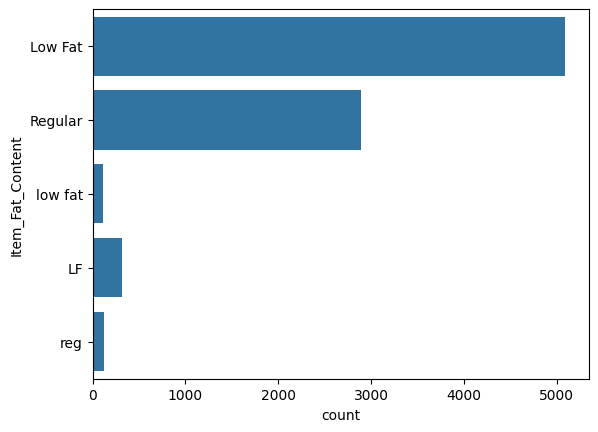

In [ ]:
sns.countplot(train_df['Item_Fat_Content'])

In [ ]:
# Converting fat content to lower case
train_df['Item_Fat_Content'] = train_df['Item_Fat_Content'].str.lower()
test_1['Item_Fat_Content'] = test_1['Item_Fat_Content'].str.lower()
# removing trailing white spaces
train_df['Item_Fat_Content'] = train_df['Item_Fat_Content'].str.strip()
test_1['Item_Fat_Content'] = test_1['Item_Fat_Content'].str.strip()

In [ ]:
fat = train_df['Item_Fat_Content'].unique()
fat.sort()
fat

array(['lf', 'low fat', 'reg', 'regular'], dtype=object)

In [ ]:
matches_lf = fuzzywuzzy.process.extract("low fat",fat , limit=2, scorer=fuzzywuzzy.fuzz.token_sort_ratio)
matches_reg = fuzzywuzzy.process.extract("regular",fat , limit=2, scorer=fuzzywuzzy.fuzz.token_sort_ratio)
# take a look at them
print("Low fat",matches_lf)
print("\nRegular",matches_reg)

Low fat [('low fat', 100), ('lf', 22)]

Regular [('regular', 100), ('reg', 60)]


In [ ]:
# function to replace rows in the provided column of the provided dataframe
# that match the provided string above the provided ratio with the provided string
def replace_matches_in_column(df, column, string_to_match, min_ratio = 0):
    # get a list of unique strings
    strings = df[column].unique()
    # get the top 10 closest matches to our input string
    matches = fuzzywuzzy.process.extract(string_to_match, strings,
                                         limit=2, scorer=fuzzywuzzy.fuzz.token_sort_ratio)
    # only get matches with a ratio > 90
    close_matches = [matches[0] for matches in matches if matches[1] >= min_ratio]
    # get the rows of all the close matches in our dataframe
    rows_with_matches = df[column].isin(close_matches)
    # replace all rows with close matches with the input matches
    df.loc[rows_with_matches, column] = string_to_match
    # let us know the function's done
    print("All Set👍")

In [ ]:
# use the function we just wrote to replace close matches to "south korea" with "south korea"
replace_matches_in_column(df=train_df, column='Item_Fat_Content', string_to_match="low fat")
replace_matches_in_column(df=train_df, column='Item_Fat_Content', string_to_match="regular")
replace_matches_in_column(df=test_1, column='Item_Fat_Content', string_to_match="low fat")
replace_matches_in_column(df=test_1, column='Item_Fat_Content', string_to_match="regular")

All Set👍
All Set👍
All Set👍
All Set👍


In [ ]:
import seaborn as sns

<Axes: xlabel='count', ylabel='Item_Fat_Content'>

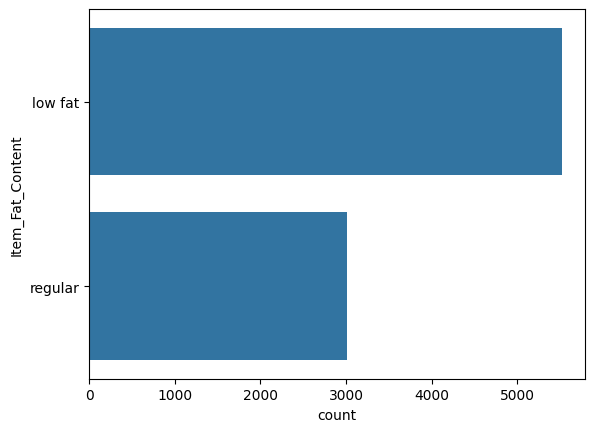

In [ ]:
sns.countplot(train_df['Item_Fat_Content'])

In [ ]:
fat = train_df['Item_Fat_Content'].unique()
fat.sort()
fat

array(['low fat', 'regular'], dtype=object)

In [ ]:
#Determine average visibility of a product
visibility_avg = train_df.pivot_table(values='Item_Visibility', index='Item_Identifier')

#Impute 0 values with mean visibility of that product:
missing_values = (train_df['Item_Visibility'] == 0)

print ('Number of 0 values initially: %d'%sum(missing_values))
train_df.loc[missing_values,'Item_Visibility'] = train_df.loc[missing_values,'Item_Identifier'].apply(lambda x: visibility_avg.at[x, 'Item_Visibility'])
print ('Number of 0 values after modification: %d'%sum(train_df['Item_Visibility'] == 0))

Number of 0 values initially: 526
Number of 0 values after modification: 0


In [ ]:
sale_type = pd.concat([train_df['Item_Outlet_Sales'],train_df['Item_Type']],axis=1)
px.box(sale_type,x='Item_Type',y='Item_Outlet_Sales')

In [ ]:
train_df['Outlet_Identifier'].value_counts()

,count
Outlet_Identifier,
OUT027,935
OUT013,932
OUT049,930
OUT046,930
OUT035,930
OUT045,929
OUT018,928
OUT017,926
OUT010,555


In [ ]:
sale_ident = pd.concat([train_df['Item_Outlet_Sales'],train_df['Outlet_Identifier']],axis=1)
px.box(sale_ident,x='Outlet_Identifier',y='Item_Outlet_Sales')

In [ ]:
train_df['Outlet_Type'].value_counts()

,count
Outlet_Type,
Supermarket Type1,5577
Grocery Store,1083
Supermarket Type3,935
Supermarket Type2,928


In [ ]:
sale_out_type = pd.concat([train_df['Item_Outlet_Sales'],train_df['Outlet_Type']],axis=1)
px.box(sale_out_type,x='Outlet_Type',y='Item_Outlet_Sales')

In [ ]:
train_df['Outlet_Size'].value_counts()

,count
Outlet_Size,
Medium,2793
Small,2388
High,932


In [ ]:
sale_out_size = pd.concat([train_df['Item_Outlet_Sales'],train_df['Outlet_Size']],axis=1)
px.box(sale_out_size,x='Outlet_Size',y='Item_Outlet_Sales')

In [ ]:
sale_year = pd.concat([train_df['Item_Outlet_Sales'],train_df['Outlet_Establishment_Year']],axis=1)
px.box(sale_year,x='Outlet_Establishment_Year',y='Item_Outlet_Sales')

<Axes: xlabel='Item_Visibility', ylabel='Density'>

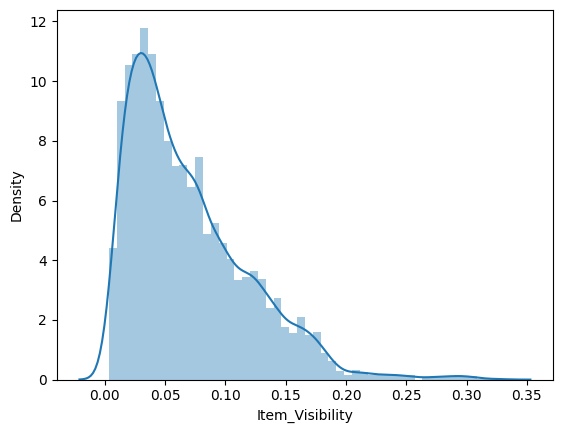

In [ ]:
sns.distplot(train_df['Item_Visibility'])

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object


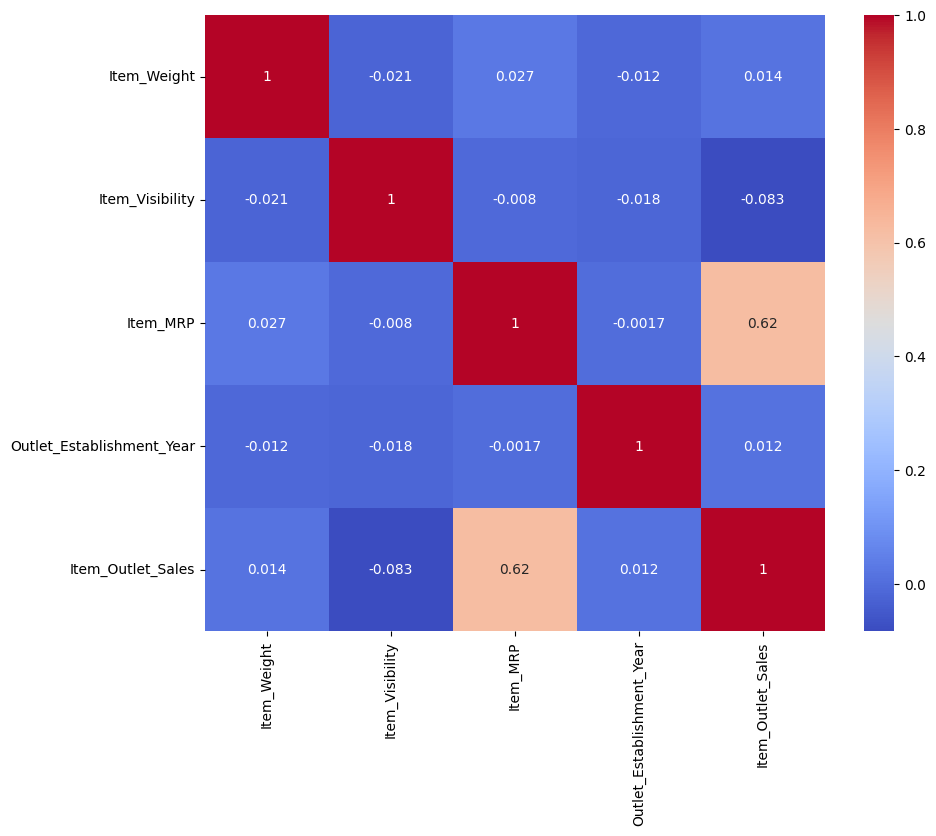

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Check data types of the columns
print(train_df.dtypes)

# Select only numeric columns
numeric_df = train_df.select_dtypes(include=[np.number])

# Optionally, handle missing values
numeric_df = numeric_df.dropna()

# Compute the correlation matrix
corr_mat = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm')
plt.show()


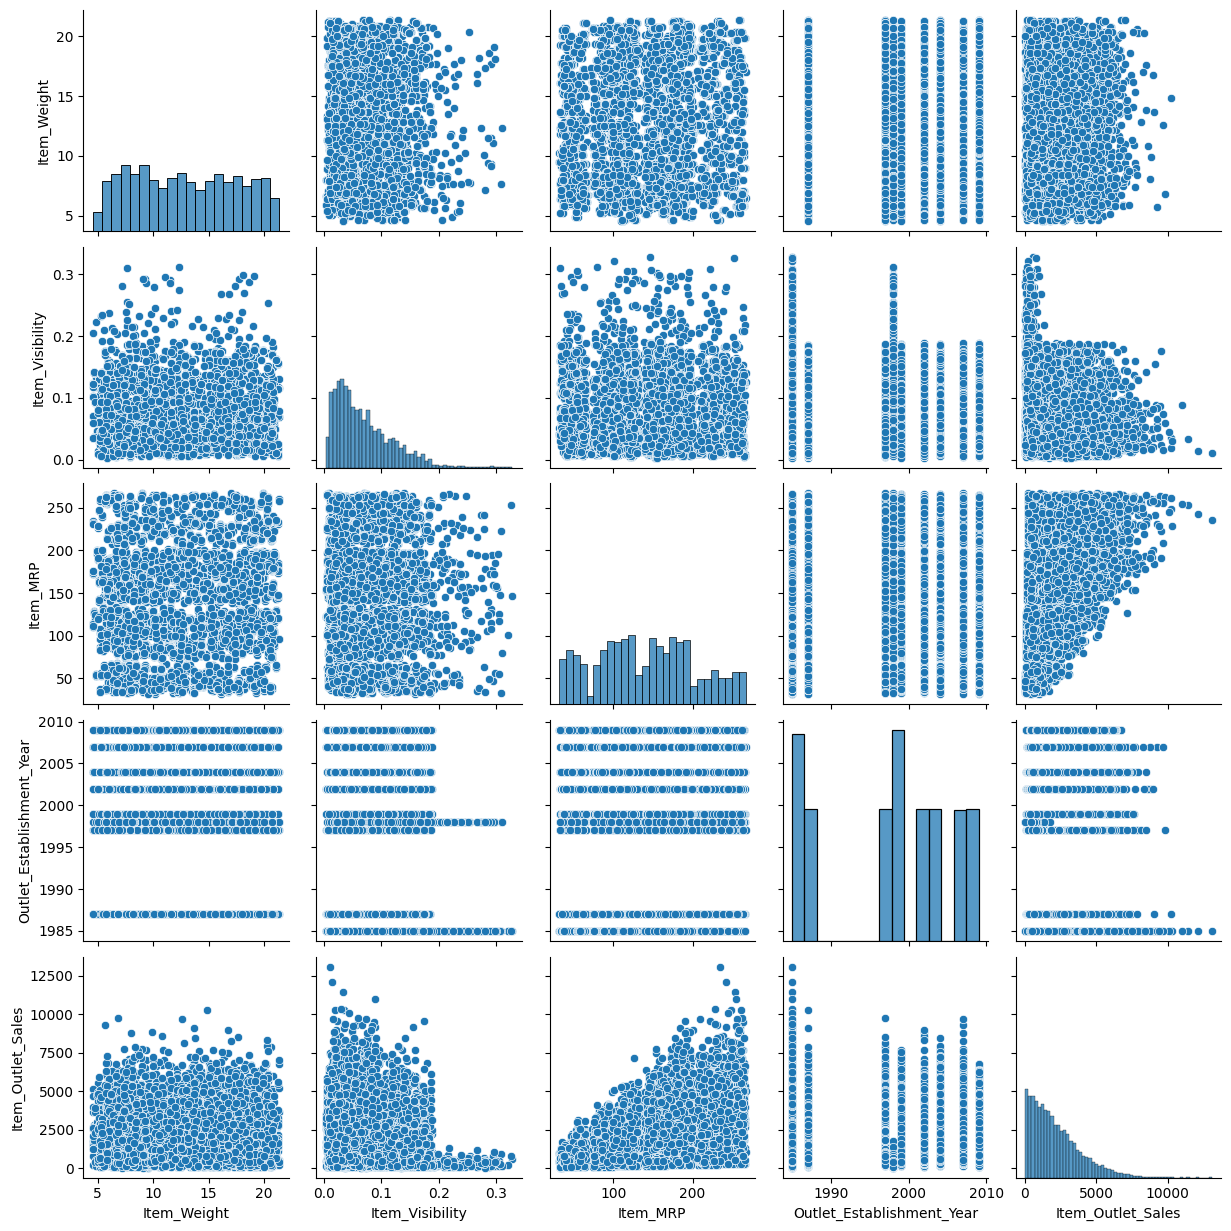

In [ ]:
sns.pairplot(train_df)

In [ ]:
train_df['Outlet_Size'] = train_df.Outlet_Size.map({'Small':0,'Medium':1,'High':2})
test_1['Outlet_Size'] = test_1.Outlet_Size.map({'Small':0,'Medium':1,'High':2})

In [ ]:
total = train_df.isnull().sum().sort_values(ascending=False)
percent = (train_df.isnull().sum()/train_df.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total,percent],axis=1,keys = ['Total','Percent'])
missing_data

,Total,Percent
Outlet_Size,2410,0.282764
Item_Weight,1463,0.171653
Item_Identifier,0,0.000000
Item_Fat_Content,0,0.000000
Item_Visibility,0,0.000000
Item_Type,0,0.000000
Item_MRP,0,0.000000
Outlet_Identifier,0,0.000000
Outlet_Establishment_Year,0,0.000000
Outlet_Location_Type,0,0.000000


<Axes: >

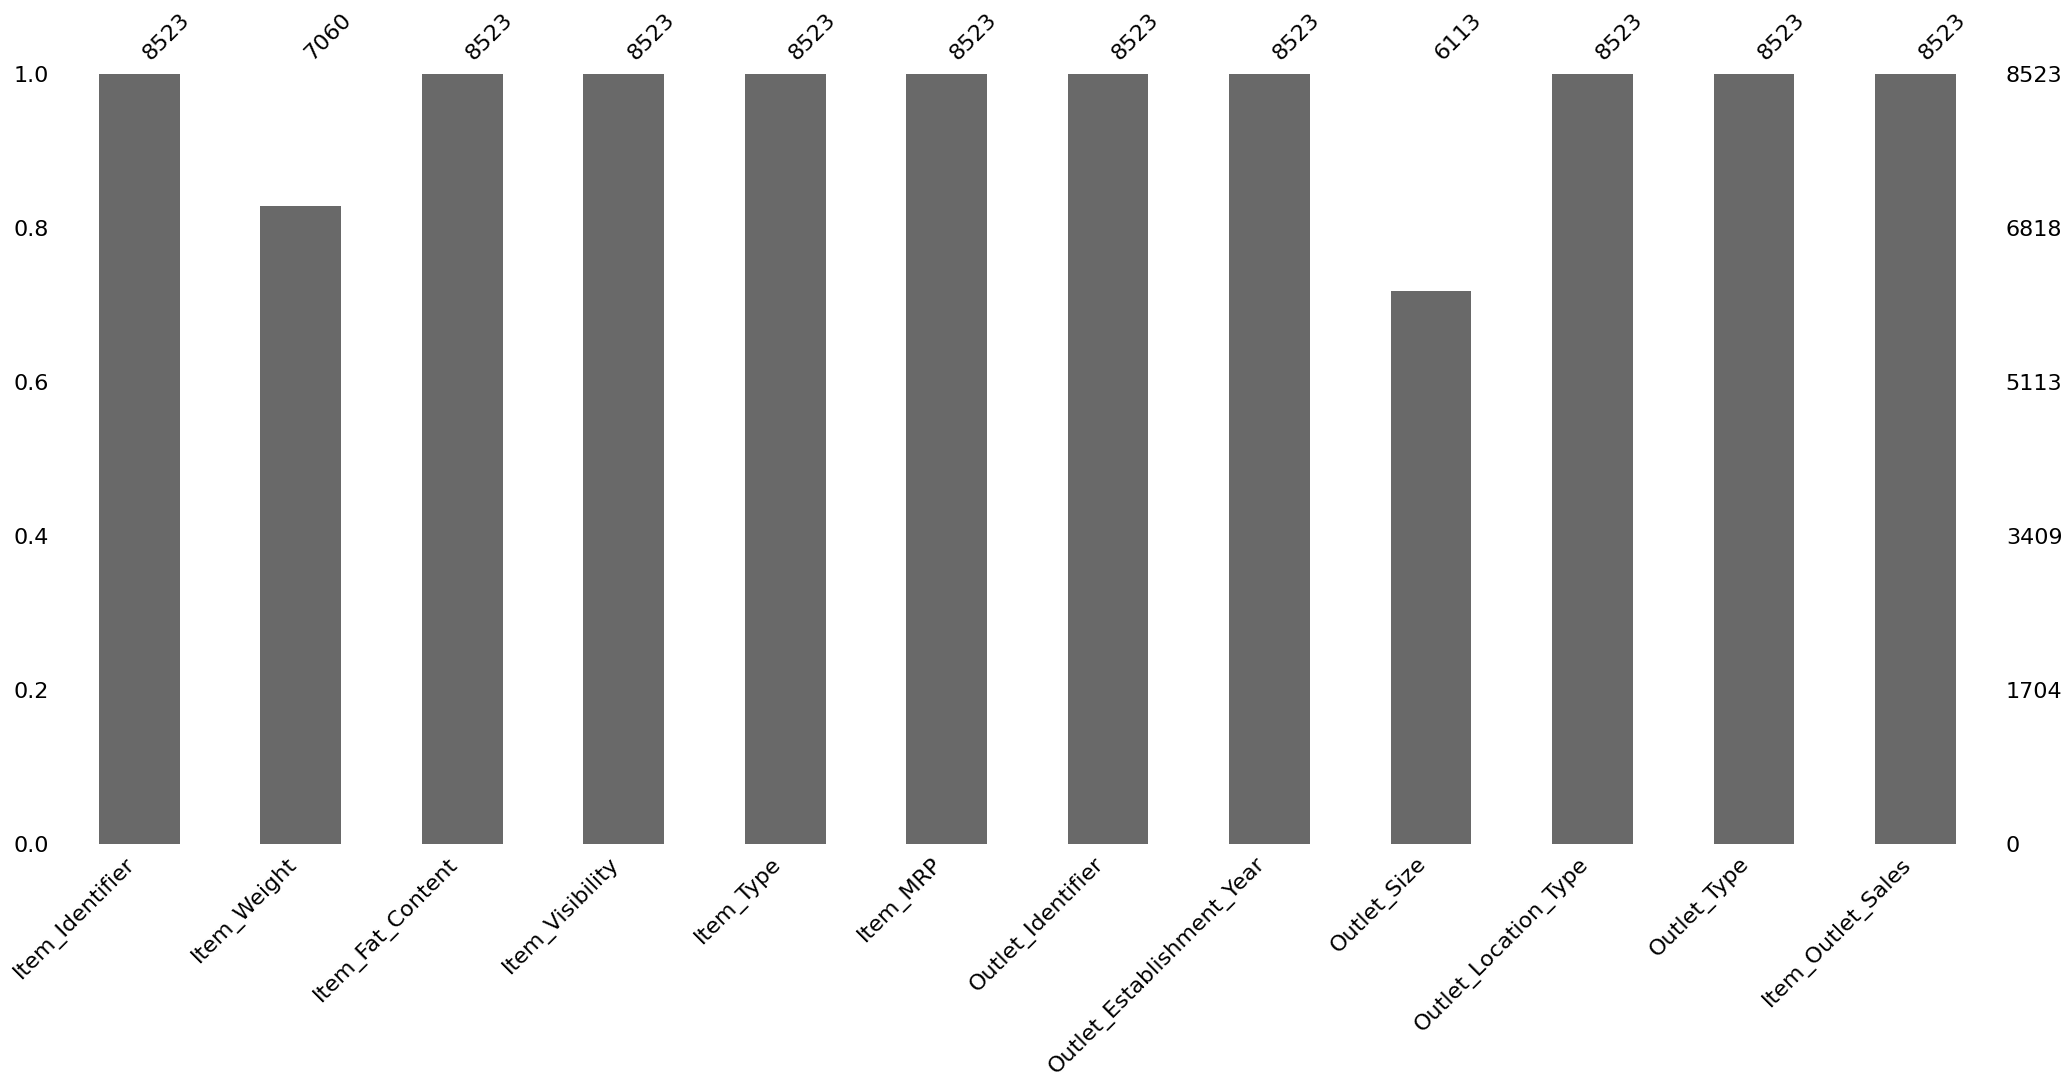

In [ ]:
mno.bar(train_df)

<Axes: >

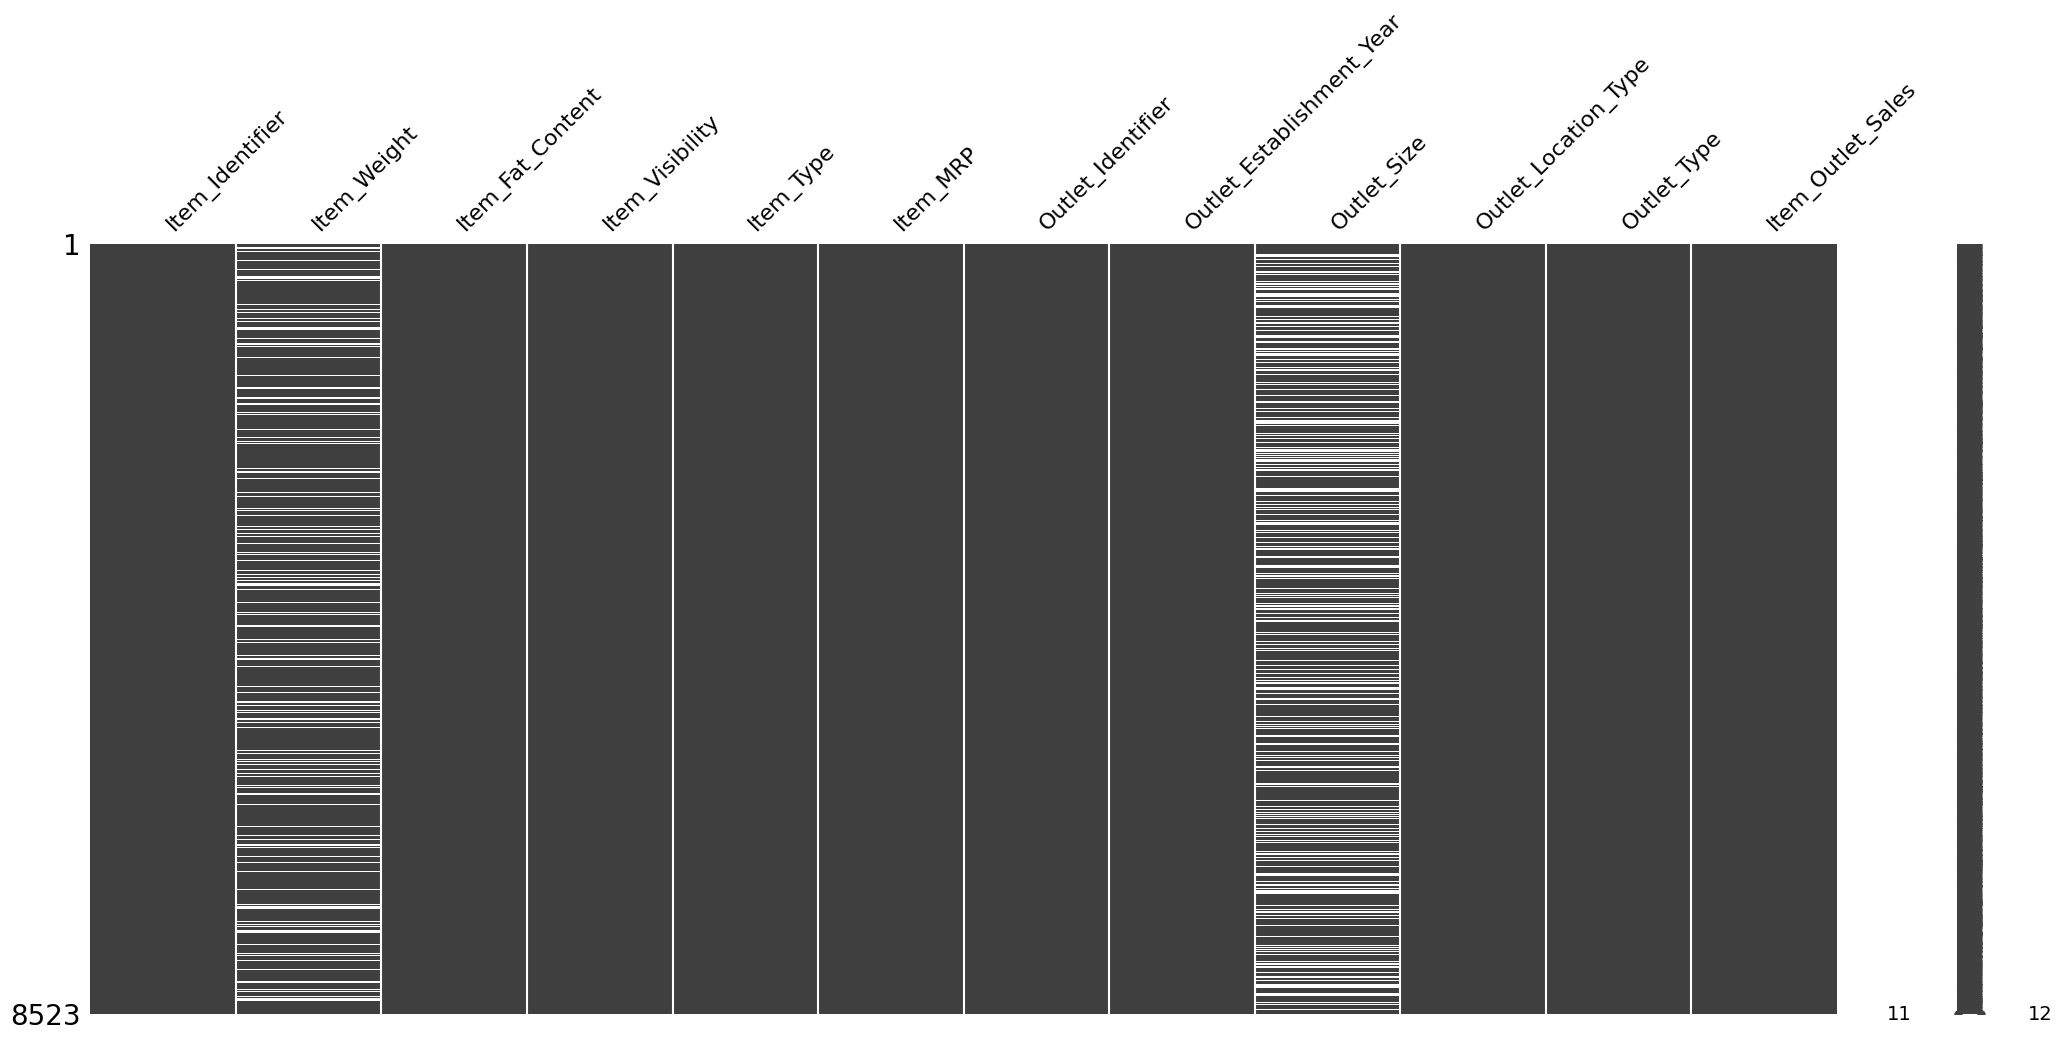

In [ ]:
mno.matrix(train_df)

<Axes: >

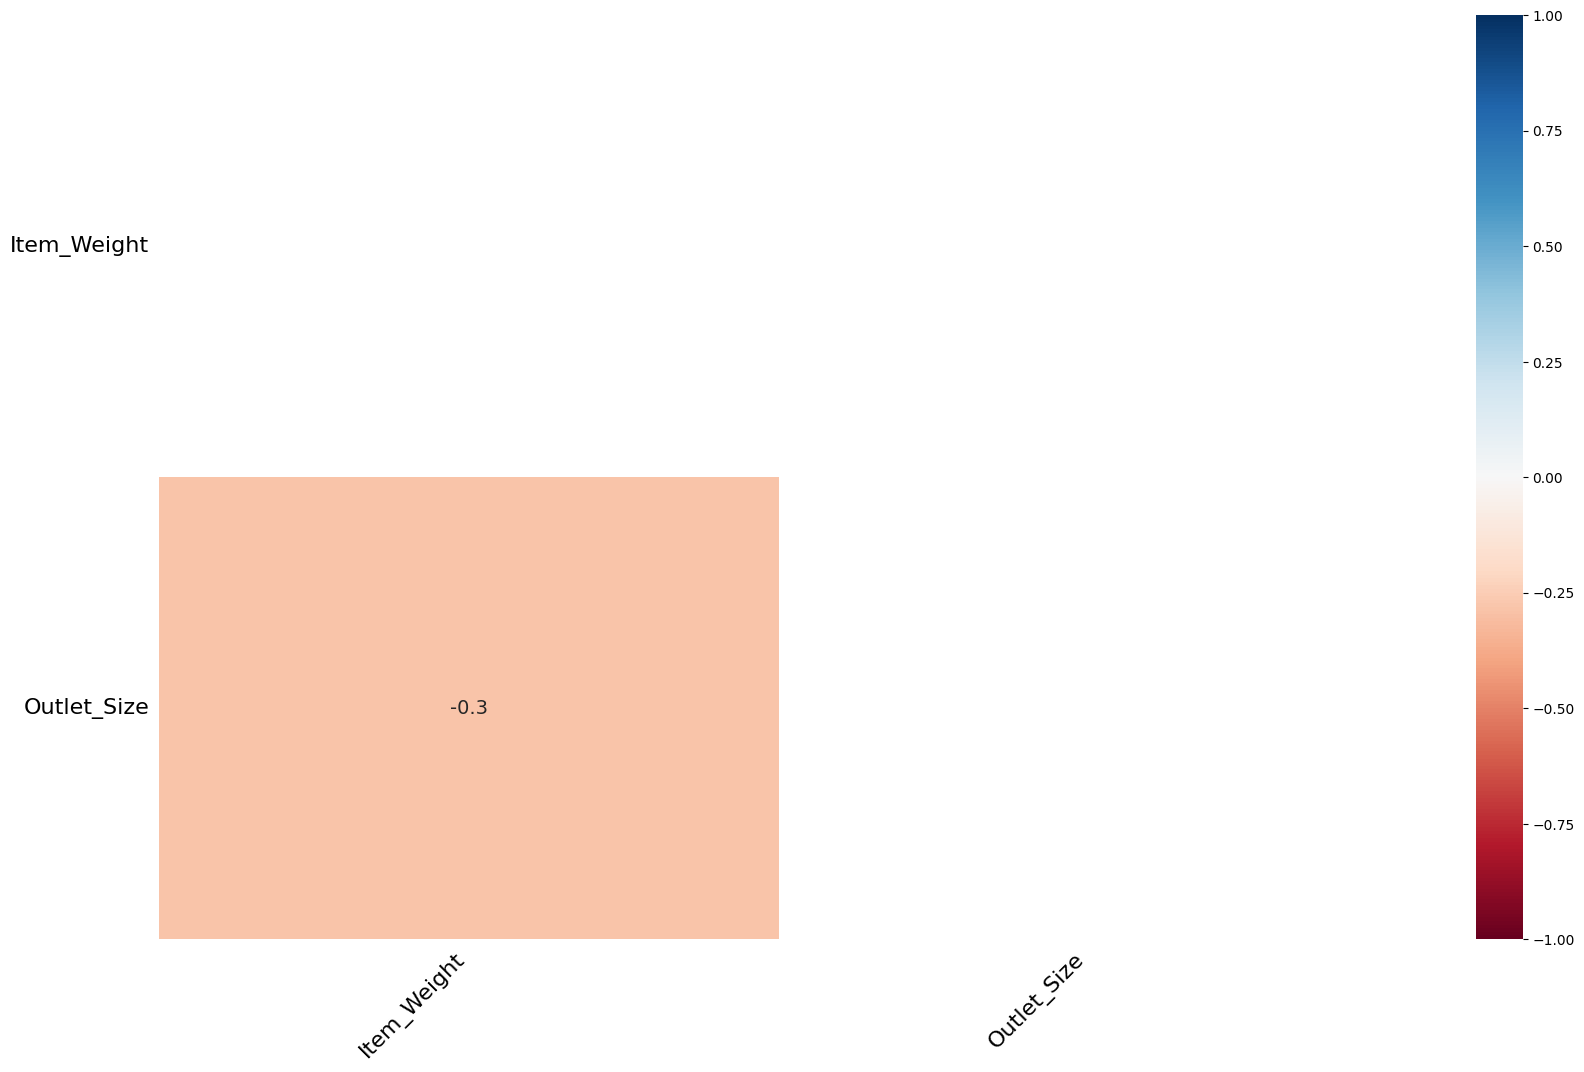

In [ ]:
mno.heatmap(train_df)

In [ ]:
print("Item Weight",train_df['Item_Weight'][20:30])
print("Outlet Size",train_df['Outlet_Size'][50:60])

Item Weight 20    18.850
21       NaN
22    14.600
23       NaN
24    13.850
25    13.000
26     7.645
27    11.650
28     5.925
29       NaN
Name: Item_Weight, dtype: float64
Outlet Size 50    0.0
51    2.0
52    2.0
53    NaN
54    NaN
55    1.0
56    NaN
57    1.0
58    0.0
59    0.0
Name: Outlet_Size, dtype: float64


In [ ]:
imputer = KNNImputer(n_neighbors=2)
train_df['Outlet_Size'] = imputer.fit_transform(train_df[['Outlet_Size']])
train_df['Item_Weight'] = imputer.fit_transform(train_df[['Item_Weight']])
test_1['Outlet_Size'] = imputer.fit_transform(test_1[['Outlet_Size']])
test_1['Item_Weight'] = imputer.fit_transform(test_1[['Item_Weight']])
train_df['Outlet_Size'] = round(train_df['Outlet_Size'],0)
test_1['Outlet_Size'] = round(test_1['Outlet_Size'],0)

In [ ]:
print("Item Weight",train_df['Item_Weight'][20:30])
print("Outlet Size",train_df['Outlet_Size'][50:60])

Item Weight 20    18.850000
21    12.857645
22    14.600000
23    12.857645
24    13.850000
25    13.000000
26     7.645000
27    11.650000
28     5.925000
29    12.857645
Name: Item_Weight, dtype: float64
Outlet Size 50    0.0
51    2.0
52    2.0
53    1.0
54    1.0
55    1.0
56    1.0
57    1.0
58    0.0
59    0.0
Name: Outlet_Size, dtype: float64


In [ ]:
print("Categories in train data are")
for j in cat_var:
    col_train = train_df[j].unique()
    print(j,col_train)

Categories in train data are
Item_Identifier ['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']
Item_Fat_Content ['low fat' 'regular']
Item_Type ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
Outlet_Identifier ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
Outlet_Size [1. 2. 0.]
Outlet_Location_Type ['Tier 1' 'Tier 3' 'Tier 2']
Outlet_Type ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


In [ ]:
train_df['Item_Type_Combined'] = train_df['Item_Identifier'].apply(lambda x: x[0:2])
#Rename them to more intuitive categories:
train_df['Item_Type_Combined'] = train_df['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':"Non_consumable",
                                                             'DR':"Daily"})
train_df['Item_Type_Combined'].value_counts()
test_1['Item_Type_Combined'] = test_1['Item_Identifier'].apply(lambda x: x[0:2])
#Rename them to more intuitive categories:
test_1['Item_Type_Combined'] = test_1['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':"Non_consumable",
                                                             'DR':"Daily"})
test_1['Item_Type_Combined'].value_counts()

,count
Item_Type_Combined,
Food,4076
Non_consumable,1087
Daily,518


In [ ]:
features = ['Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
        'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Type_Combined']
label = ['Item_Outlet_Sales']
x=train_df[features]
y=train_df[label]
test_model = test_1[features]


In [ ]:
train_df[features].head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_Combined
0,9.30,low fat,0.016047,249.8092,OUT049,1999,1.0,Tier 1,Supermarket Type1,Food
1,5.92,regular,0.019278,48.2692,OUT018,2009,1.0,Tier 3,Supermarket Type2,Daily
2,17.50,low fat,0.016760,141.6180,OUT049,1999,1.0,Tier 1,Supermarket Type1,Food
3,19.20,regular,0.015274,182.0950,OUT010,1998,1.0,Tier 3,Grocery Store,Food
4,8.93,low fat,0.008082,53.8614,OUT013,1987,2.0,Tier 3,Supermarket Type1,Non_consumable


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=45,test_size=0.2)

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_MRP                   8523 non-null   float64
 4   Outlet_Identifier          8523 non-null   object 
 5   Outlet_Establishment_Year  8523 non-null   int64  
 6   Outlet_Size                8523 non-null   float64
 7   Outlet_Location_Type       8523 non-null   object 
 8   Outlet_Type                8523 non-null   object 
 9   Item_Type_Combined         8523 non-null   object 
dtypes: float64(4), int64(1), object(5)
memory usage: 666.0+ KB


In [ ]:
object_cols = [cname for cname in x if x[cname].dtype == 'object']
num_X_train = [cname for cname in x if x[cname].dtype in ['int64','float']]

In [ ]:
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

OH_X_train_1 = pd.DataFrame(ohe.fit_transform(x_train[object_cols]))
OH_X_valid_1 = pd.DataFrame(ohe.transform(x_test[object_cols]))

OH_X_train_1.index = x_train[object_cols].index
OH_X_valid_1.index = x_test[object_cols].index

num_X_train = x_train.drop(object_cols, axis=1)
num_X_valid = x_test.drop(object_cols, axis=1)

oh_x_train = pd.concat([num_X_train, OH_X_train_1], axis=1)
oh_x_valid = pd.concat([num_X_valid, OH_X_valid_1], axis=1)

# On Test Data
test_model_oh = pd.DataFrame(ohe.transform(test_model[object_cols]))
test_model_oh.index = test_model[object_cols].index

num_X_test = test_model.drop(object_cols, axis=1)
test_final = pd.concat([num_X_test, test_model_oh], axis=1)


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Ensure all column names are strings
oh_x_train.columns = oh_x_train.columns.astype(str)
oh_x_valid.columns = oh_x_valid.columns.astype(str)
test_final.columns = test_final.columns.astype(str)

# Ensure data types are consistent
oh_x_train = oh_x_train.astype(float)
oh_x_valid = oh_x_valid.astype(float)
test_final = test_final.astype(float)

# Train the model
model1 = RandomForestRegressor(n_estimators=100, random_state=0)
model1.fit(oh_x_train, y_train)

# Predict and evaluate
pred_rf = model1.predict(oh_x_valid)
rand_for = mean_squared_error(y_test, pred_rf, squared=False)
print(rand_for)

# Make predictions on the final test set
pred1 = model1.predict(test_final)


1154.0531113173818


In [ ]:
model2 = LinearRegression()
model2.fit(oh_x_train,y_train)
pred_lin = model2.predict(oh_x_valid)
lin_reg = mean_squared_error(y_test, pred_lin,squared=False)
print(lin_reg)
pred2 = model2.predict(test_final)
pred2 = pred2.reshape(-1)

1141.2741948435357


In [ ]:
model_knn = KNeighborsRegressor()
model_knn.fit(oh_x_train,y_train)
pred_knn = model_knn.predict(oh_x_valid)
knn = mean_squared_error(y_test,pred_knn,squared=False)
print(knn)
test_pred = model_knn.predict(test_final)
test_pred = test_pred.reshape(-1)

1224.46165087392


In [ ]:
# Convert all column names to strings
oh_x_train.columns = oh_x_train.columns.astype(str)
oh_x_valid.columns = oh_x_valid.columns.astype(str)
test_final.columns = test_final.columns.astype(str)

# Train the model
model_dec = DecisionTreeRegressor()
model_dec.fit(oh_x_train, y_train)

# Validate the model
pred_dec = model_dec.predict(oh_x_valid)
dec_tree = mean_squared_error(y_test, pred_dec, squared=False)
print(dec_tree)

# Predict on the test set
pred_test_dec = model_dec.predict(test_final)


1541.3269514196202


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Train the model
model_dec = DecisionTreeRegressor()
model_dec.fit(oh_x_train, y_train)

# Validate the model
pred_dec = model_dec.predict(oh_x_valid)
dec_tree = mean_squared_error(y_test, pred_dec, squared=False)
print(dec_tree)

# Predict on the test set
pred_test_dec = model_dec.predict(test_final)
# Reshaping might not be necessary if pred_test_dec is already 1D.


1568.2080538648954


In [ ]:
model_svm = LinearSVR()
model_svm.fit(oh_x_train,y_train)
pred_svm = model_svm.predict(oh_x_valid)
svm = mean_squared_error(y_test,pred_svm,squared=False)
print(svm)
pred_test_svm = model_svm.predict(test_final)
pred_test_svm = pred_test_svm.reshape(-1)

1279.3703462802173


In [ ]:
estimators = [('lr', RidgeCV()),('svr', LinearSVR(random_state=42))]
stack_reg = StackingRegressor(estimators=estimators,final_estimator=RandomForestRegressor(n_estimators=10,random_state=42))
stack_reg.fit(oh_x_train,y_train)
pred_stack = stack_reg.predict(oh_x_valid)
stack_regressor = mean_squared_error(y_test,pred_stack,squared=False)
print(stack_regressor)
stack_ensemble_test = stack_reg.predict(test_final)
stack_ensemble_test = stack_ensemble_test.reshape(-1)

1260.6458523990939


In [ ]:
import xgboost as xg
import numpy as np
from sklearn.metrics import mean_squared_error

# Create the XGBRegressor model
xgb_r = xg.XGBRegressor(objective='reg:squarederror', n_estimators=10, seed=123)

# Fitting the model
xgb_r.fit(oh_x_train, y_train)

# Predict the model
pred_xgb = xgb_r.predict(oh_x_valid)

# RMSE Computation
rmse_xgboost = np.sqrt(mean_squared_error(y_test, pred_xgb))
print("RMSE : %f" % (rmse_xgboost))

# Predict on the test data
xbg_test = xgb_r.predict(test_final)
xbg_test = xbg_test.reshape(-1)


RMSE : 1110.073224


In [ ]:
result = pd.DataFrame({'Model' : ['LINEAR REGRESSION','RANDOM FOREST','DECISION TREE','SVM','KNN','XGBoost','Stacking Regressor'],
                       'Score' : [lin_reg,rand_for,dec_tree,svm,knn,rmse_xgboost,stack_regressor]})
result_df = result.sort_values(by='Score',ascending=True)
result_df = result_df.set_index('Score')
result_df

,Model
Score,
1110.073224,XGBoost
1141.274195,LINEAR REGRESSION
1154.053111,RANDOM FOREST
1224.461651,KNN
1260.645852,Stacking Regressor
1279.370346,SVM
1568.208054,DECISION TREE
